In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import wbgapi
import matplotlib.pyplot as plt
df = pd.read_csv('all_exports.csv')

## Introduction

The data file in contains records of all exports of pigs from Denmark from 1 June 2012 to 30 November 2022.

The file contains the following columns:

- transport_date: date on which the export happened
- transport_time: time on which the export departed from the sender
- sender_id: id for the sender of the transport
- recipient_country: country code for the recipient country for the transport
- num_animals: number of animals on the transport
- reporting_datetime: date and time stamp for when the transport is reported to the authorities

## Yearly changes in the number of pig exports

To see how the export of pigs from Denmark has changed over time, it would be useful to analyze the yearly export data. By grouping the data by year and aggregating the number of animals exported, we can get a sense of the overall trend in the volume of pig exports from Denmark.


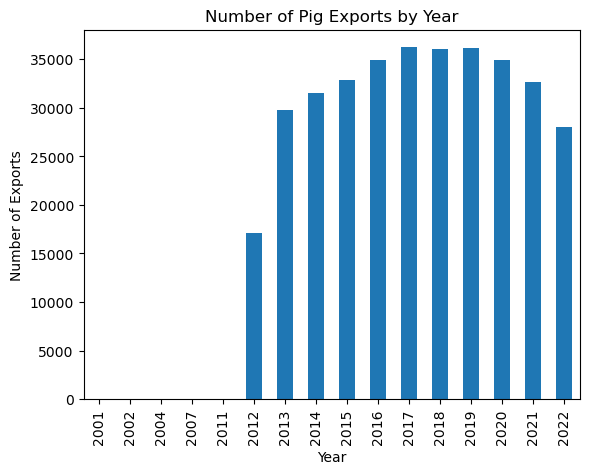

In [2]:
df['transport_date'] = pd.to_datetime(df['transport_date']) # convert to datetime format for easier analysis
df['year'] = df['transport_date'].dt.year 
df['month'] = df['transport_date'].dt.month 
df['day'] = df['transport_date'].dt.day 
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Pig Exports by Year')
plt.xlabel('Year')
plt.ylabel('Number of Exports')
plt.show()

The analysis of the yearly export data for pigs from Denmark shows that the number of animals exported has been decreasing in the last three years, this could have several implications.

Firstly, it may indicate a shift in global demand for pork, with fewer countries importing pigs from Denmark. This could be due to factors such as increased competition from other pork-producing countries, changes in consumer preferences, or fluctuations in global economic conditions.

## Top 10 largest pig export markets by country

By analyzing the recipient country column, it may be possible to determine which countries are the top importers of Danish pigs. This information can be useful for trade negotiations or for identifying potential new markets.

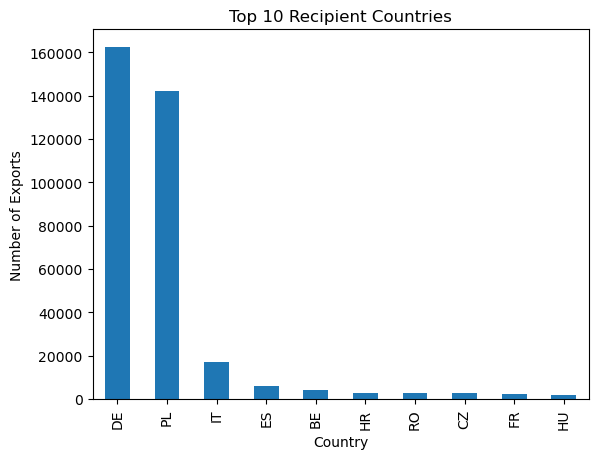

In [3]:
df['recipient_country'].value_counts().head(10).plot(kind='bar') # top 10 countries
plt.title('Top 10 Recipient Countries')
plt.xlabel('Country')
plt.ylabel('Number of Exports')
plt.show()

Top 10 Countries who imports most pigs from Danmark are: 
 1. DE - Germany
 2. PL - Poland
 3. IT - Italy
 4. ES - Spain
 5. BE - Belgium
 6. HR - Croatia
 7. RO - Romania
 8. CZ - Czech Republic
 9. FR - France
10. HU - Hungary

This information can provide valuable insights for stakeholders in the Danish pork industry, such as exporters and policymakers.
For example, it may be useful for Danish exporters to focus their efforts on these top importing countries, as they represent the largest markets for Danish pigs. This could involve developing targeted marketing campaigns, forging partnerships with local distributors, and adapting products to meet the specific needs of each market.

## Relationship between the number of pigs exported and GDP

We can analyze whether the GDP of the top 10 countries that import pigs from Denmark has any correlation with the amount of pigs they import. By examining the relationship between GDP and import volumes, we may be able to identify potential factors that drive demand for Danish pigs in these countries.

<module 'matplotlib.pyplot' from 'c:\\Users\\bala0\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

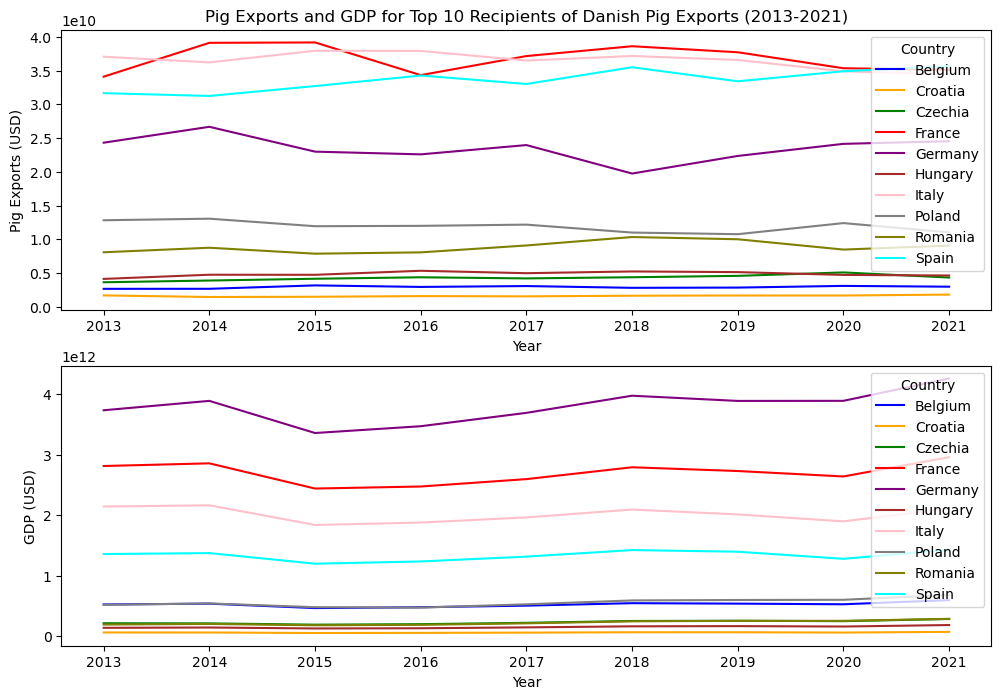

In [9]:
import requests


country_codes = ['DE', 'PL', 'IT', 'ES', 'BE', 'HR', 'RO', 'CZ', 'FR', 'HU']

# Define the API endpoint and indicator codes for pig exports and GDP
endpoint = 'http://api.worldbank.org/v2/country/{}/indicator/{}'
pig_exports_indicator = 'NV.AGR.TOTL.KD'
gdp_indicator = 'NY.GDP.MKTP.CD'

# Define the API parameters for the years 2012 to 2022
params = {
    'format': 'json',
    'per_page': 500,
    'date': '2013:2023'
}

# Fetch the pig exports data for the top 10 recipients of Danish pig exports
pig_exports_data = []
for country in country_codes:
    url = endpoint.format(country, pig_exports_indicator)
    response = requests.get(url, params=params)
    json_data = response.json()
    for entry in json_data[1]:
        pig_exports_data.append({
            'Country': entry['country']['value'],
            'Year': entry['date'],
            'Pig Exports': entry['value']
        })
pig_exports_df = pd.DataFrame(pig_exports_data)

# Fetch the GDP data for the top 10 recipients of Danish pig exports
gdp_data = []
for country in country_codes:
    url = endpoint.format(country, gdp_indicator)
    response = requests.get(url, params=params)
    json_data = response.json()
    for entry in json_data[1]:
        gdp_data.append({
            'Country': entry['country']['value'],
            'Year': entry['date'],
            'GDP': entry['value']
        })
gdp_df = pd.DataFrame(gdp_data)

# Merge the two dataframes on country and year columns
merged_df = pd.merge(pig_exports_df, gdp_df, on=['Country', 'Year'])

# Pivot the merged dataframe to wide format for plotting
df_wide = merged_df.pivot(index='Year', columns='Country', values=['Pig Exports', 'GDP'])

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), dpi=100)

df_wide['Pig Exports'].plot(ax=ax1, legend=True, title='Pig Exports and GDP for Top 10 Recipients of Danish Pig Exports (2013-2021)', xlabel='Year', ylabel='Pig Exports (USD)', color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])

df_wide['GDP'].plot(ax=ax2, legend=True, xlabel='Year', ylabel='GDP (USD)', color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])


plt

It looks like there not a clear correlation between the GDP and the amount of pigs imported from Denmark.Overall, while GDP is an important economic indicator, the lack of a clear correlation with pig import volumes suggests that there are many other factors that are driving demand for Danish pork in the global market

## Supply chain of pig exports from Denmark.

In [10]:

df["sender_id"] = df["sender_id"].astype(str)

# Combine the sender_id and recipient_country columns to create a supply chain column
df["supply_chain"] = df["sender_id"] + "-" + df["recipient_country"]

supply_chain_counts = df["supply_chain"].value_counts()

supply_chain_counts.head(10)

941-PL    22092
278-PL    19748
452-PL    18232
1-PL      14369
440-DE    12920
2-PL      12109
483-DE    10221
452-DE    10061
483-PL     9090
278-DE     7097
Name: supply_chain, dtype: int64

Poland is the country with the highest number of supply lines in the export of pigs from Denmark.It is essential to regularly monitor and assess the supply chain dynamics and market trends in Poland, and adapt the export strategy accordingly to maintain a strong and competitive position in the market.

# Long term trend in pig exports over time

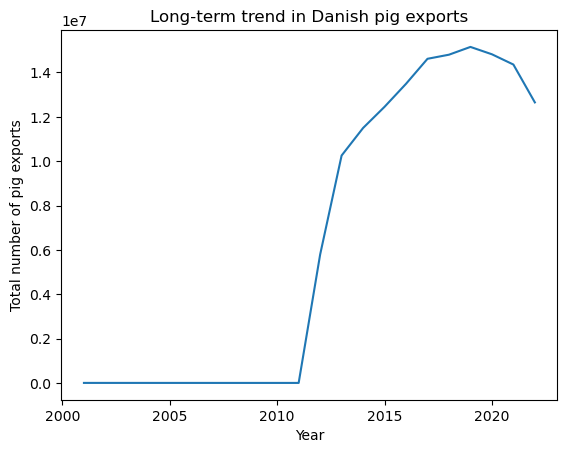

In [11]:

df['transport_date'] = pd.to_datetime(df['transport_date'])

df['year'] = df['transport_date'].dt.year

# Group the data by year and sum the num_animals column to get total exports per year
yearly_totals = df.groupby('year')['num_animals'].sum()

plt.plot(yearly_totals.index, yearly_totals.values)
plt.xlabel('Year')
plt.ylabel('Total number of pig exports')
plt.title('Long-term trend in Danish pig exports')
plt.show()


Trend is that Danmark is exporting less and less pigs over time. This could be due to several factors, such as increased competition from other pork-producing countries, changes in consumer preferences, or fluctuations in global economic conditions.

# Lets look at anomoly in the datausing DBSCAN algorithm

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


df['transport_date'] = (df['transport_date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
df['transport_date'] = df['transport_date'].astype('int64')

X = df[['num_animals', 'transport_date']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN algorithm to detect anomalies
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

df['anomaly'] = dbscan.labels_

anomalies = df[df['anomaly'] == -1]
print(anomalies)

PS-- My latop cannot calculate this i also tried to use google colab but it used all the ram and did not finish the calculation.
 Hopefully i can do this kind of calculation if i get hired at at your place.

# Lets look at Seasonal trends in the data

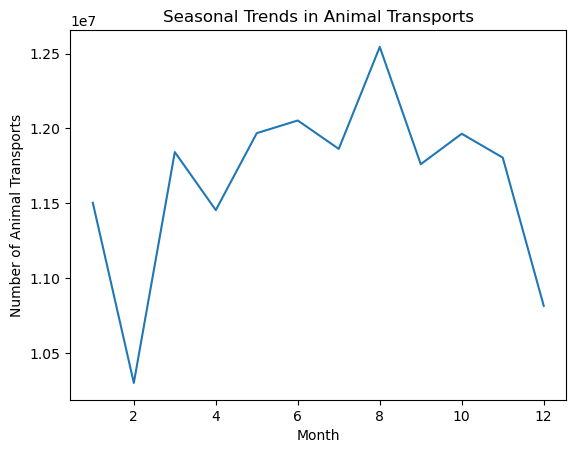

In [ ]:

# Convert the transport_date column to a pandas datetime format
df['transport_date'] = pd.to_datetime(df['transport_date'])

# Group the data by month and count the number of animal transports
monthly_counts = df.groupby(df['transport_date'].dt.month)['num_animals'].sum()

plt.plot(monthly_counts.index, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Animal Transports')
plt.title('Seasonal Trends in Animal Transports')
plt.show()


Danmark exports low amount of pigs between november and february. This could be  because the pigs are fattened in the winter and then sold in the spring. This is also the reason why the number of transports is higher in the spring and summer.

# Lets look at how much time it takes to export pigs from Denmark to other countries. 

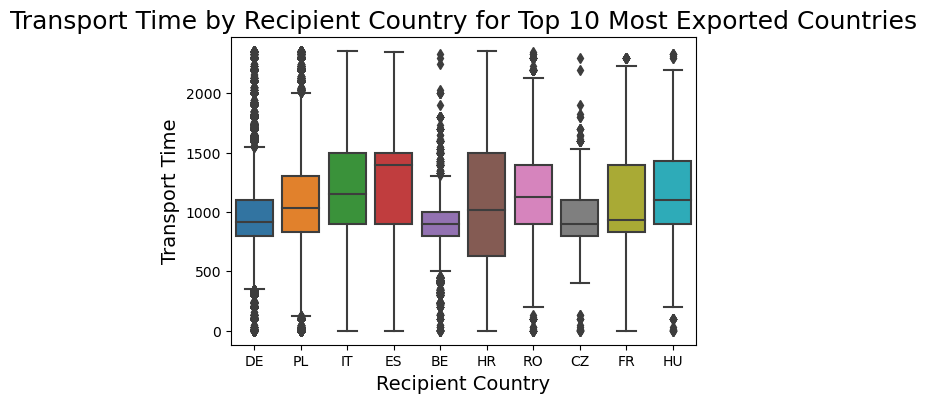

In [ ]:
import seaborn as sns

top_countries = df['recipient_country'].value_counts().head(10).index

df_top_countries = df[df['recipient_country'].isin(top_countries)]

plt.figure(figsize=(6, 4)) 
sns.boxplot(x='recipient_country', y='transport_time', data=df_top_countries, order=top_countries)

plt.title('Transport Time by Recipient Country for Top 10 Most Exported Countries', fontsize=18)
plt.xlabel('Recipient Country', fontsize=14)
plt.ylabel('Transport Time', fontsize=14)

plt.show()

Belgium, Germany and  Czech Republic has the best transport time while, France and Hungary has the worst transport time.